In [1]:
from EXP1whiteblackground import clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap, average_mlae_and_visualize, plot_vectorized_predictions_scatter, display_images_combined_by_degree, generate_images_for_multiple_angles, analyze_best_model_by_image_type, analyze_image_type_per_model, plot_mlae_per_image

I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Generate 10 images with 10 angle degrees with aliased, anti-aliasied, and vectorized images.

In [ ]:
generate_images_for_multiple_angles(canvas_size=100, line_length=30, num_angles=10)

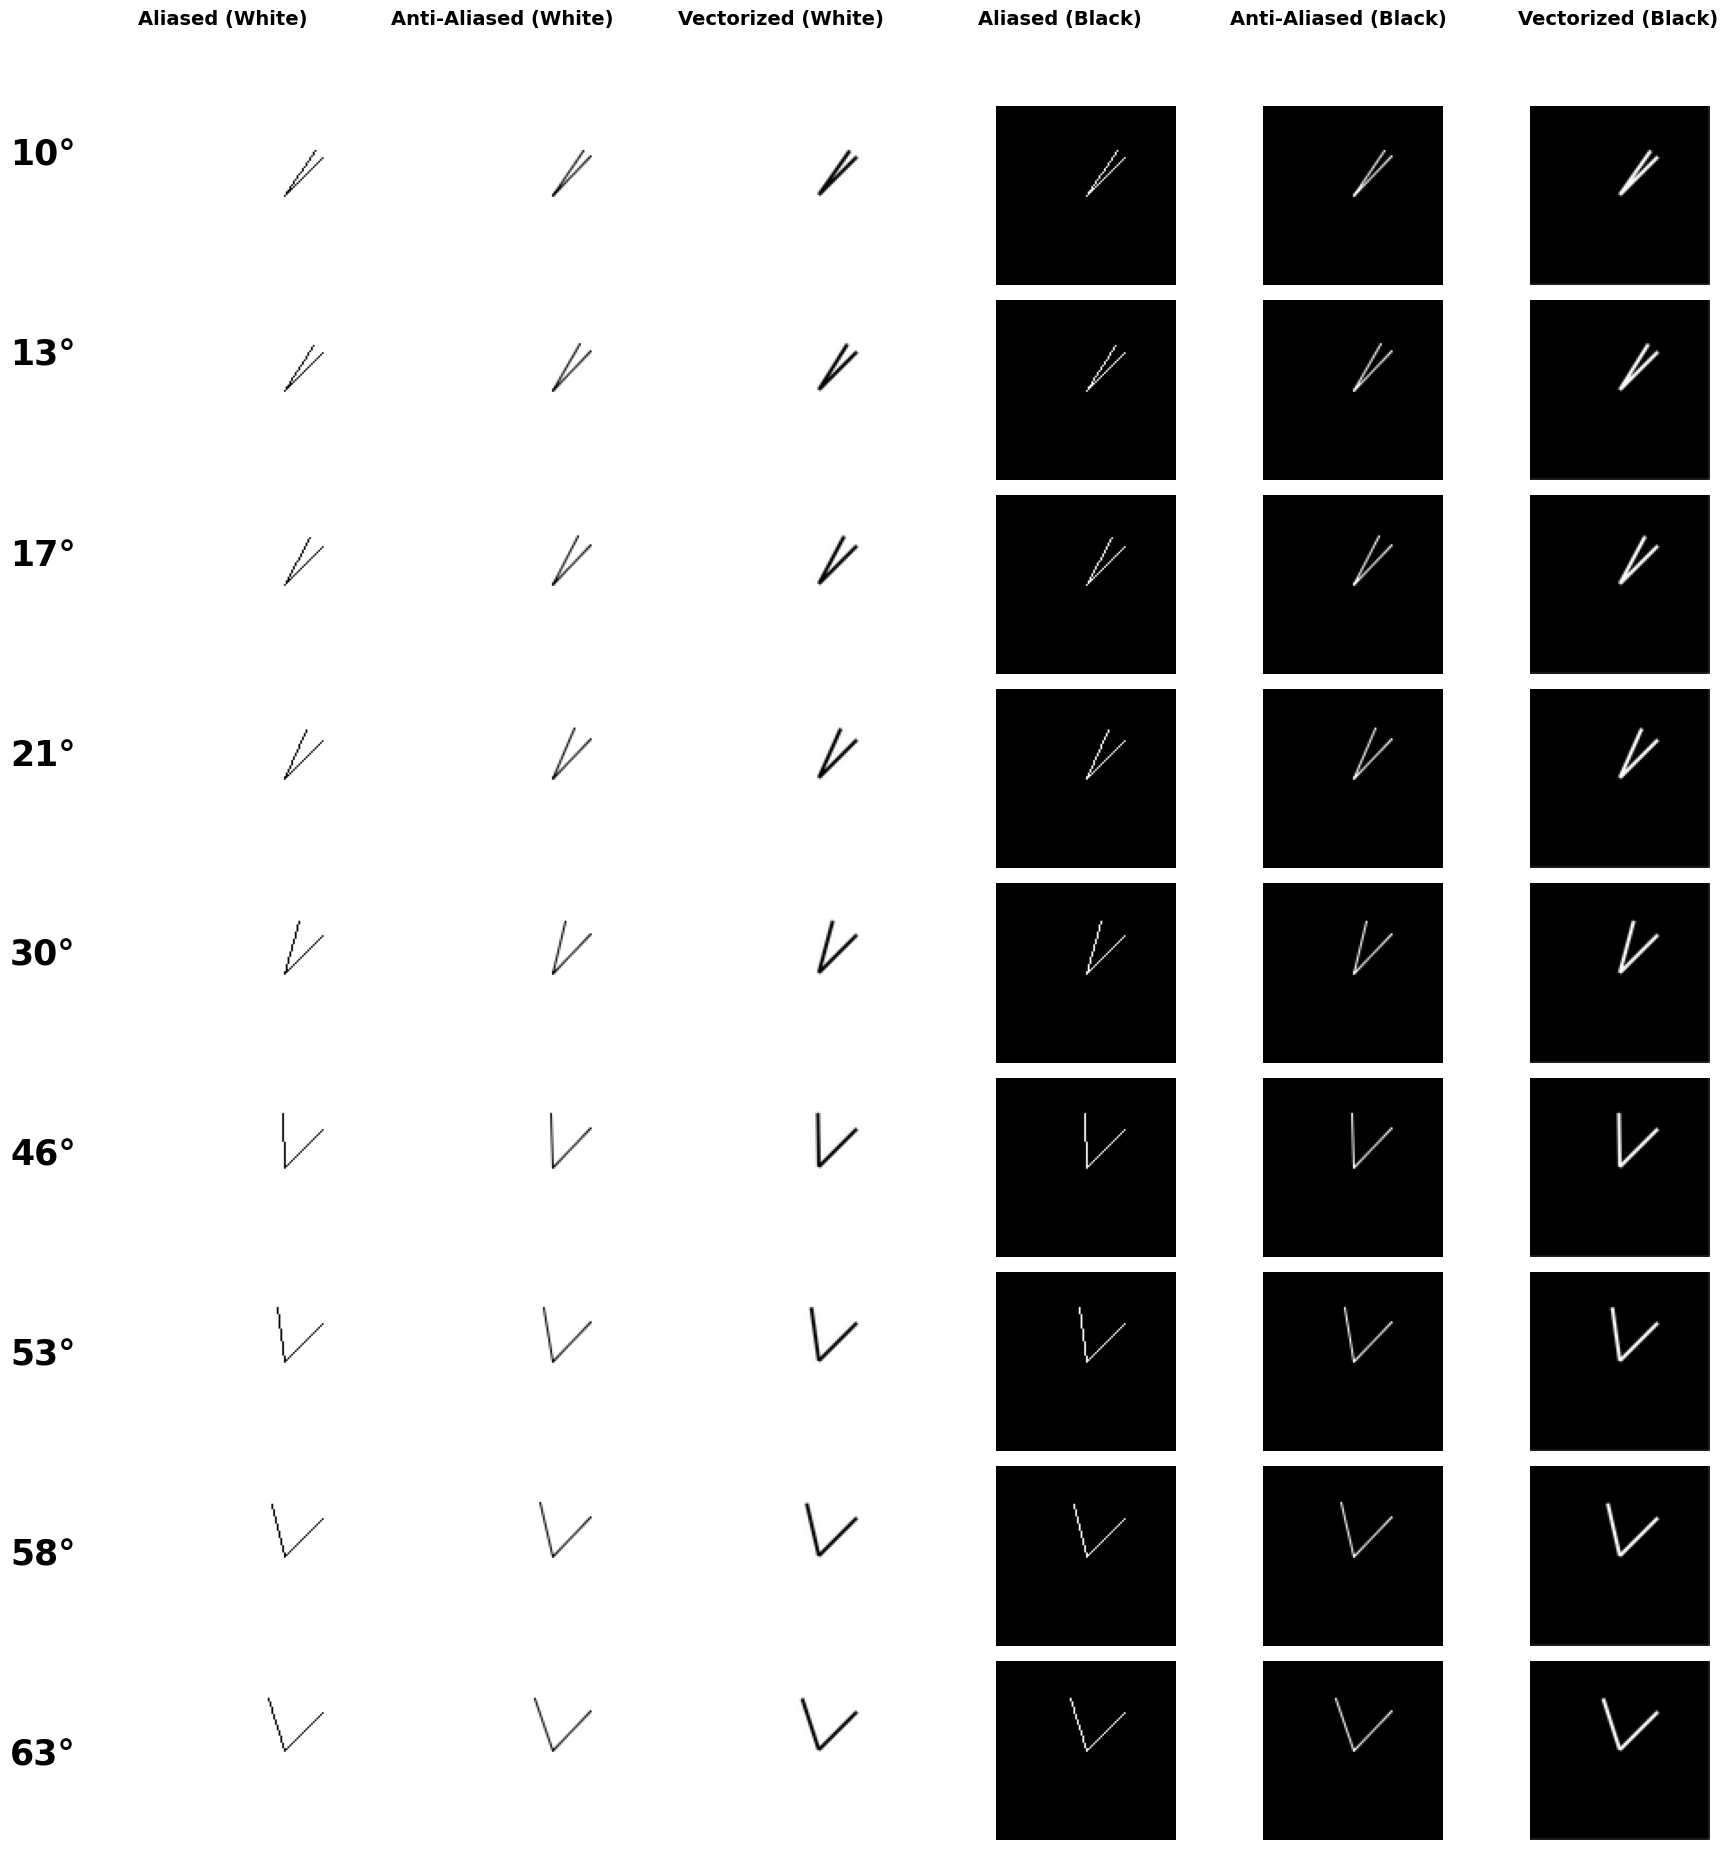

In [5]:
display_images_combined_by_degree("./generated_images")

### Run experiments

In [ ]:
# Add LLMP path
from EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data
import LLMP as L

image_dir = "./generated_images"

# Prepare image data
data = prepare_image_data(image_dir)

# Define model instances
model_instances = {
    "gpt4o": L.GPTModel("gpt-4o"),
    #"LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),
    "GeminiProVision": L.GeminiProVision(),
    "Gemini1_5Flash": L.Gemini1_5Flash()
}
# Create Runexp1 instance and run the experiment
experiment = Runexp1()
experiment.run_angle_experiment(data=data, model_instances=model_instances)

- I won't include Llama model for this experiment as my CUDA has errors now. I already scheduled with Leo to fix this problem next Monday. I might share with you later next week.

In [3]:
from EXP1whiteblackground import clean_experiment_data, calculate_mlae, calculate_row_mlae, plot_mlae_heatmap

df = clean_experiment_data("angle_results.csv")

In [4]:
# Apply MLAE calculation row-wise
df['MLAE'] = df.apply(calculate_row_mlae, axis=1)

df.head()

,file_name,ground_truth,model,prediction,MLAE
0,antialiased_image_white_58.png,58,gpt4o,45,3.714246
1,antialiased_image_white_58.png,58,GeminiProVision,30,4.813781
2,antialiased_image_white_58.png,58,Gemini1_5Flash,45,3.714246
3,aliased_image_black_13.png,13,gpt4o,30,4.098032
4,aliased_image_black_13.png,13,GeminiProVision,45,5.005625


- Only few predictions near the ground truth. The prediction answers has repetive value like 20, 30, 45 across all models and images.

### Display number of rows for each image type

In [5]:
# Extract the image type from the file name
df['image_type'] = df['file_name'].str.extract(r'(aliased|antialiased|vectorized)')

# Print the count of rows for each image type
row_counts = df['image_type'].value_counts()

for image_type, count in row_counts.items():

    print(f"  {image_type}: {count} rows")

  antialiased: 54 rows
  aliased: 54 rows
  vectorized: 54 rows


### Analyze which image type works best for each model

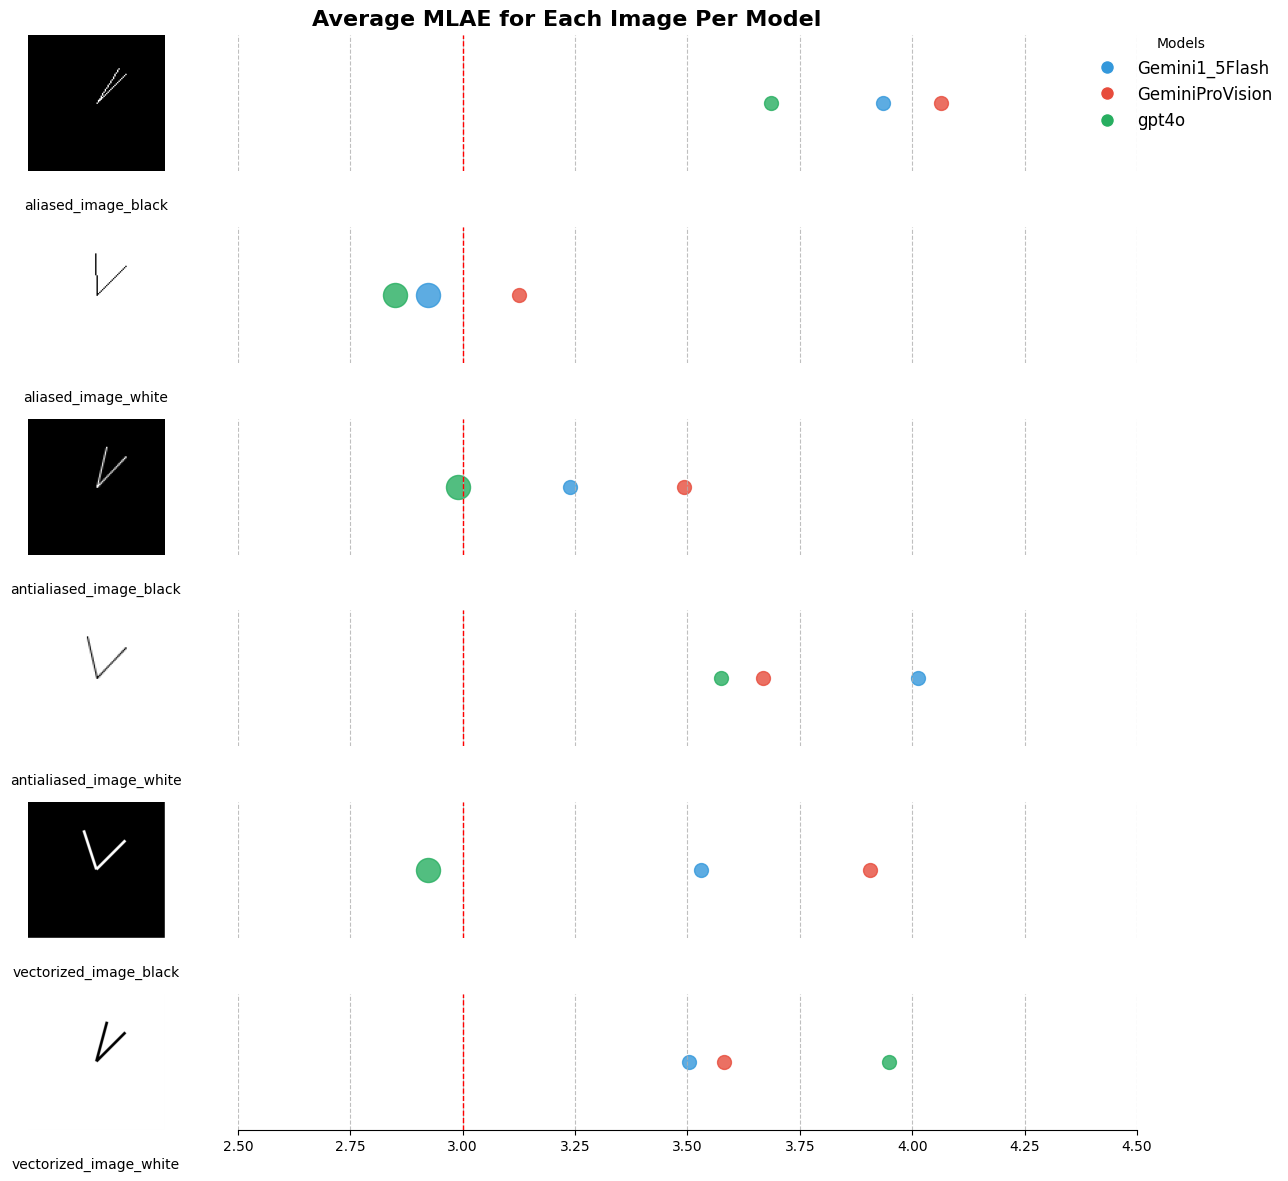

In [6]:
# Call the function
plot_mlae_per_image(
    df=df,
    image_folder="./generated_images",
    model_colors={
        'Gemini1_5Flash': '#3498DB',  # Blue
        'GeminiProVision': '#E74C3C',  # Red
        'gpt4o': '#27AE60',           # Green
    }
)